In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings as wr
wr.filterwarnings('ignore')

In [3]:
# data is collected from kaggle
df = pd.read_csv('Sales data (3).csv')

In [4]:
df.head()

,Unnamed: 0,Date,Sales
0,0,1/4/2015,14.934283
1,1,1/11/2015,7.234714
2,2,1/18/2015,27.953771
3,3,1/25/2015,50.460597
4,4,2/1/2015,20.316933


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,Date,Sales
0,1/4/2015,14.934283
1,1/11/2015,7.234714
2,1/18/2015,27.953771
3,1/25/2015,50.460597
4,2/1/2015,20.316933


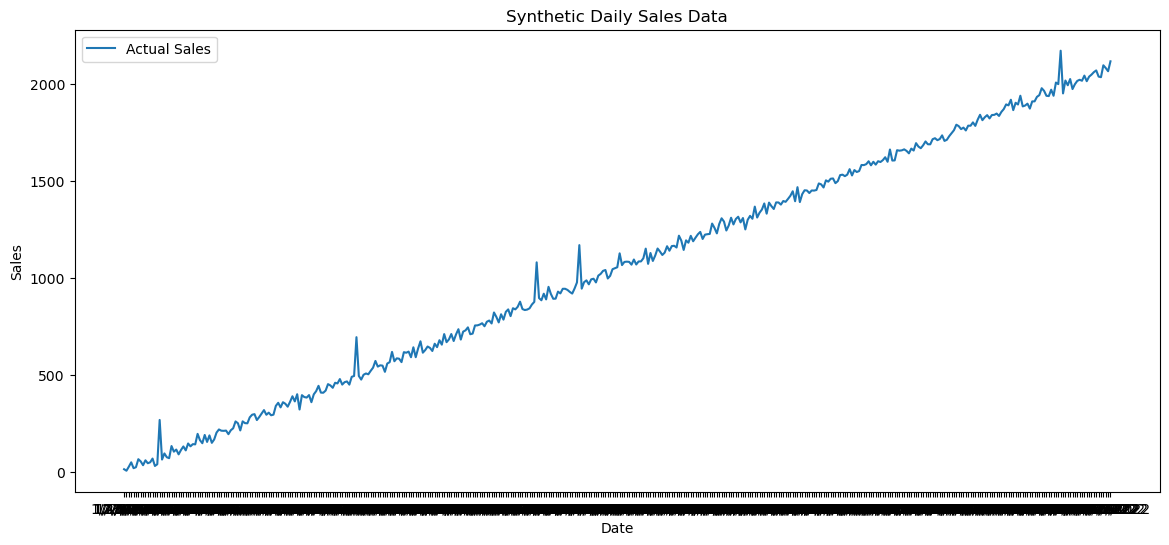

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [8]:
df.head()

,Date,Sales
0,1/4/2015,14.934283
1,1/11/2015,7.234714
2,1/18/2015,27.953771
3,1/25/2015,50.460597
4,2/1/2015,20.316933


In [9]:
df['Date'] = pd.to_datetime(df['Date']).dt.floor('D')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    417 non-null    datetime64[ns]
 1   Sales   417 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [12]:
df["DayOfYear"] = df["Date"].dt.dayofyear

df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

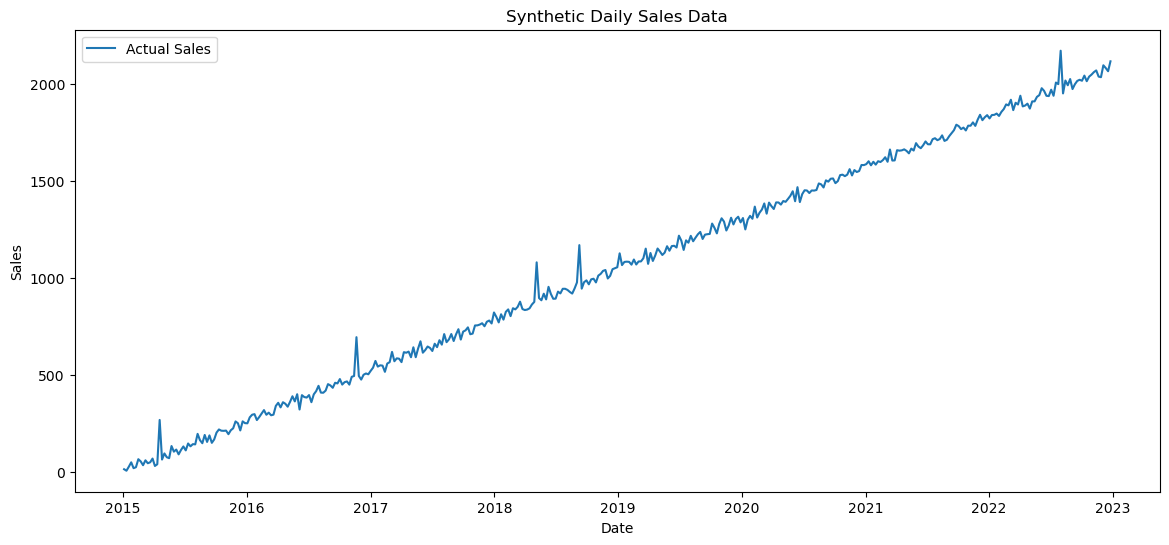

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales") #line chart
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [14]:
df.head()

,Date,Sales,DayOfYear,DayOfWeek,Month,Year
0,2015-01-04,14.934283,4,6,1,2015
1,2015-01-11,7.234714,11,6,1,2015
2,2015-01-18,27.953771,18,6,1,2015
3,2015-01-25,50.460597,25,6,1,2015
4,2015-02-01,20.316933,32,6,2,2015


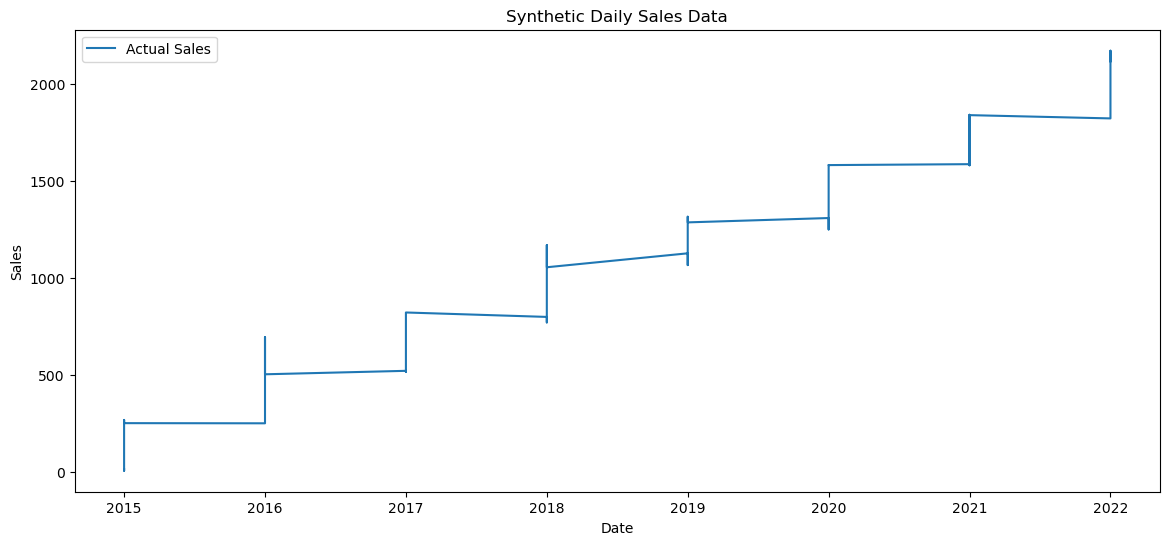

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(df["Year"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [16]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [17]:
train_data.head()

,Date,Sales,DayOfYear,DayOfWeek,Month,Year
0,2015-01-04,14.934283,4,6,1,2015
1,2015-01-11,7.234714,11,6,1,2015
2,2015-01-18,27.953771,18,6,1,2015
3,2015-01-25,50.460597,25,6,1,2015
4,2015-02-01,20.316933,32,6,2,2015


In [20]:
xtrain = train_data[["DayOfWeek", "Month", "Year", "DayOfYear"]]
ytrain = train_data["Sales"]

xtest = test_data[["DayOfWeek", "Month", "Year", "DayOfYear"]]
ytest = test_data["Sales"]

In [22]:
xtrain.shape

(333, 4)

In [23]:
xtest.shape

(84, 4)

In [24]:
xtrain.head()

,DayOfWeek,Month,Year,DayOfYear
0,6,1,2015,4
1,6,1,2015,11
2,6,1,2015,18
3,6,1,2015,25
4,6,2,2015,32


In [25]:
ytrain.head()

0    14.934283
1     7.234714
2    27.953771
3    50.460597
4    20.316933
Name: Sales, dtype: float64

# Linear Regression

In [26]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [27]:
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 761.4418898291613


In [28]:
y_pred

array([1674.07283225, 1679.3808271 , 1683.11790825, 1688.42590309,
       1693.73389794, 1699.04189279, 1702.77897394, 1708.08696878,
       1713.39496363, 1718.70295848, 1722.44003963, 1727.74803447,
       1733.05602932, 1738.36402417, 1743.67201901, 1747.40910016,
       1752.71709501, 1758.02508986, 1763.3330847 , 1767.07016585,
       1772.3781607 , 1777.68615555, 1782.99415039, 1788.30214524,
       1792.03922639, 1797.34722124, 1802.65521608, 1807.96321093,
       1811.70029208, 1817.00828693, 1822.31628177, 1827.62427662,
       1834.6470611 , 1839.95505594, 1845.26305079, 1850.57104564,
       1855.87904049, 1859.61612163, 1864.92411648, 1870.23211133,
       1875.54010618, 1879.27718732, 1884.58518217, 1889.89317702,
       1895.20117187, 1898.93825301, 1904.24624786, 1909.55424271,
       1914.86223756, 1918.5993187 , 1923.90731355, 1929.2153084 ,
       1934.52330325, 1939.83129809, 1943.56837924, 1948.87637409,
       1954.18436894, 1959.49236378, 1963.22944493, 1968.53743

In [29]:
model.score(xtest, ytest)

0.9530799885067525

In [30]:
#Lose for each observation
residuals = ytest - y_pred
residuals.head()

333   -17.616066
334    15.121568
335    -6.059056
336   -19.935847
337   -10.161615
Name: Sales, dtype: float64

Text(0, 0.5, 'Residuals')

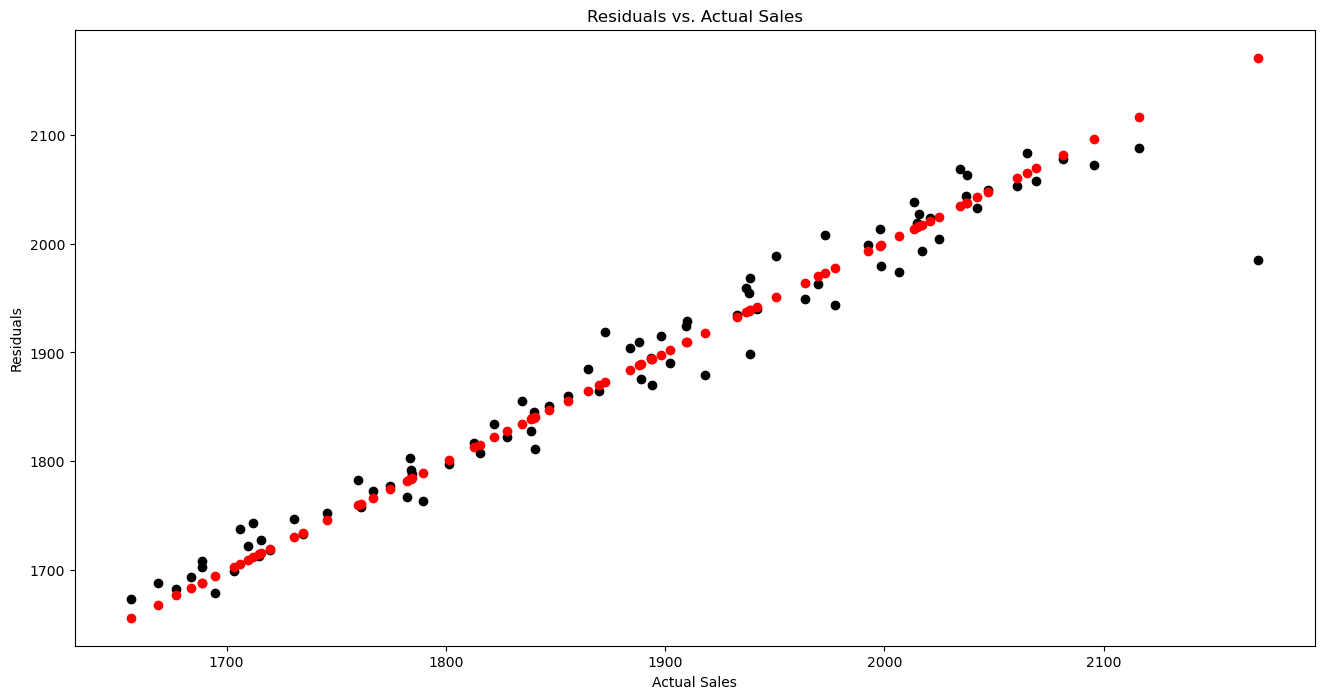

In [31]:
plt.figure(figsize=(16, 8)) 
plt.scatter(ytest, y_pred, color='black')  # actual y and predicted
plt.scatter(ytest, ytest, color='red') # 
plt.title("Residuals vs. Actual Sales") 
plt.xlabel("Actual Sales") 
plt.ylabel("Residuals") 

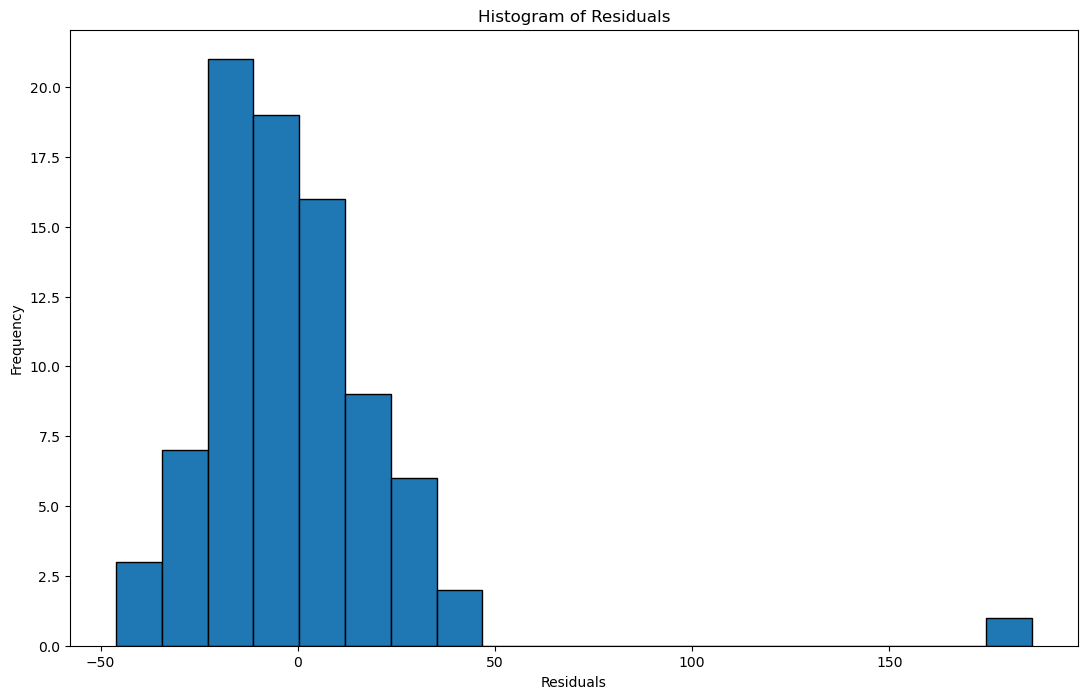

In [32]:
plt.figure(figsize=(13, 8)) 
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Forecasting into the Future

In [36]:
forecast_dates = pd.date_range(start="2023-01-01", end="2025-12-31", freq="D")
forecast_data = pd.DataFrame({"Date": forecast_dates})
forecast_data

,Date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1091,2025-12-27
1092,2025-12-28
1093,2025-12-29
1094,2025-12-30


In [38]:
forecast_data["DayOfWeek"] = forecast_data["Date"].dt.dayofweek
forecast_data["Month"] = forecast_data["Date"].dt.month
forecast_data["Year"] = forecast_data["Date"].dt.year
forecast_data["DayOfYear"] = forecast_data["Date"].dt.dayofyear


In [39]:
forecast_data

,Date,DayOfWeek,Month,Year,DayOfYear
0,2023-01-01,6,1,2023,1
1,2023-01-02,0,1,2023,2
2,2023-01-03,1,1,2023,3
3,2023-01-04,2,1,2023,4
4,2023-01-05,3,1,2023,5
...,...,...,...,...,...
1091,2025-12-27,5,12,2025,361
1092,2025-12-28,6,12,2025,362
1093,2025-12-29,0,12,2025,363
1094,2025-12-30,1,12,2025,364


In [41]:
forecast_sales = model.predict(forecast_data[["DayOfWeek", "Month", "Year", "DayOfYear", ]])

In [42]:
forecast_sales

array([2095.09753209, 2095.85581707, 2096.61410205, ..., 2874.73415546,
       2875.49244043, 2876.25072541])

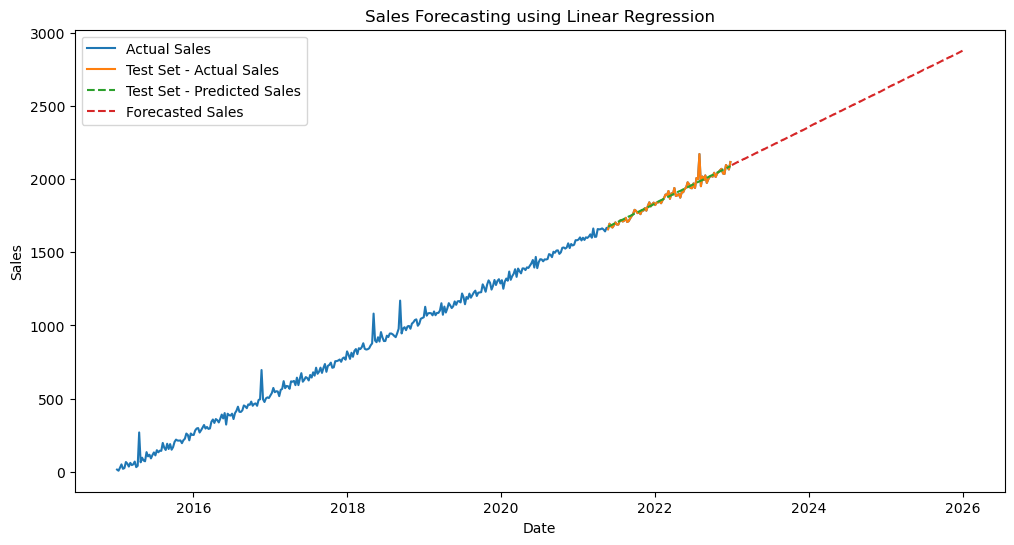

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.plot(test_data["Date"], ytest, label="Test Set - Actual Sales")
plt.plot(test_data["Date"], y_pred, label="Test Set - Predicted Sales", linestyle="--")
plt.plot(forecast_data["Date"], forecast_sales, label="Forecasted Sales", linestyle="--") #predicted
plt.title("Sales Forecasting using Linear Regression") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()
plt.show()